## **MODEL TRAINING**

WE ARE NOT SAVING THAT CSV FILE BECAUSE WE CANNOT DO THAT MUCH FEATURE ENGINEERING, WE ARE GOING TO AUTOMATE THOSE STEPS

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv("data/gemstone.csv")
dataset

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [4]:
dataset.drop('id', axis=1, inplace=True)

In [5]:
# independent and dependent feature seperation
X = dataset.drop('price', axis=1)
y = dataset['price']

In [9]:
# numerical and categorical seggregation
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

In [11]:
# define custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [17]:
from sklearn.impute import SimpleImputer # handling missing values
from sklearn.preprocessing import StandardScaler # handling feature scaling
from sklearn.preprocessing import OrdinalEncoder # rank based ordinal encoding

# pipelining (combining multiple steps in an order)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

##### because OrdinalEncoder class encodes rank based ordinal categorical features based on an integer array we stored each one of the categories into a list first
##### (see the code above the scikit learn import cell)

## **PIPELINING**

In [18]:
# numerical pipeline : first, we will try to handle missing values using SimpleImputer
# then we will be using StandardScaler for feature scaling

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy = 'median')),
        # instance_variable      library to be used
        ('scaler', StandardScaler())
    ]
)

In [20]:
# categorical pipeline : we just need to perform rank ordinal encoding using OrdinalEncoder
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
                            # not mode because there's no strategy named mode in SimpleImputer
        ('encoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])),
                            # categories should be in the same order as features present in the dataset
        ('scaler', StandardScaler())
    ]
)

#### DO WE NEED TO COMBINE THESE PIPELINES?
#### FOR THIS WE IMPORTED COLUMN TRANSFORMER

In [21]:
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_features),
    #   variable       pipeline    on which features to apply
    ('cat_pipeline', cat_pipeline, categorical_features)
])

### PIPELINING IS MOST IMPORTANT, DON'T IGNORE

In [28]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [29]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

Everything is done mentioned in the pipeline on X_train

In [30]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,0.874100,-0.936747,1.350746
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,-1.137644,0.910853,0.684455
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,-0.131772,0.910853,0.018164
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,0.874100,-0.320880,2.017037
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,-1.137644,1.526720,-0.648127
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,-1.137644,-0.936747,-0.648127
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,-1.137644,-0.320880,-0.648127
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,-0.131772,0.294987,0.018164
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,-1.137644,0.294987,2.017037


In [31]:
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [32]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,0.874100,-1.552614,-0.648127
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,-1.137644,0.294987,-1.314417
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,-0.131772,-0.936747,2.017037
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,-0.131772,1.526720,2.017037
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,0.874100,0.910853,-0.648127
...,...,...,...,...,...,...,...,...,...
58067,0.255007,0.535873,0.921902,0.416340,0.369414,0.425874,-1.137644,1.526720,-1.314417
58068,-0.607514,0.535873,-0.641897,-0.528495,-0.554351,-0.499920,0.874100,-1.552614,0.018164
58069,-0.823144,-0.019414,-0.641897,-0.834441,-0.862273,-0.847093,0.874100,0.294987,2.017037
58070,0.901897,-0.667249,1.443168,1.046230,0.967145,0.932167,-0.131772,1.526720,-0.648127


In [34]:
# model training
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
print(f"Regression Coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Regression Coefficients : [ 6432.97591819  -132.34206204   -70.48787525 -1701.38593925
  -494.17005097   -76.32351645    68.80035873  -464.67990411
   652.10059539]
Intercept : 3976.878738902296


### *but, can we automate this?*
##### let's automate all this

In [42]:
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [43]:
# train multiple models, out of them whichevers accuracy is high we will use that
models = {
    'linear_reg':LinearRegression(),
    'lasso_reg':Lasso(),
    'ridge_reg':Ridge(),
    'elastic_reg':ElasticNet()
}

In [47]:
model_list = []
r2_list = []

# we need to iterate to all the models and check the accuracy of each of the model
for i in range(len(list(models))):
    model = list(models.values())[i]  # will give all the values from key value pairs
    model.fit(X_train, y_train)
    
    # prediction
    y_pred = model.predict(X_test)
    
    # evaluating each model iteratively
    mae, rmse, r2_square = evaluate_model(y_test, y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("MODEL TRAINING PERFORMANCE")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"R-SQUARED : {r2_square*100} %")
    
    r2_list.append(r2_square)
    
    print("-"*30)
    print("\n")

linear_reg
MODEL TRAINING PERFORMANCE
RMSE : 1014.6296630375463
MAE : 675.0758270067483
R-SQUARED : 93.62906819996049 %
------------------------------


lasso_reg
MODEL TRAINING PERFORMANCE
RMSE : 1014.6591302750638
MAE : 676.2421173665508
R-SQUARED : 93.62869814082755 %
------------------------------


ridge_reg
MODEL TRAINING PERFORMANCE
RMSE : 1014.63432335344
MAE : 675.1077629781328
R-SQUARED : 93.62900967491633 %
------------------------------


elastic_reg
MODEL TRAINING PERFORMANCE
RMSE : 1533.3541245902313
MAE : 1060.9432977143008
R-SQUARED : 85.44967219374031 %
------------------------------




In [46]:
model_list

['linear_reg', 'lasso_reg', 'ridge_reg', 'elastic_reg']

NOW WE WILL BE PRESENTING THE ACCURACIES VIA GRAPH USING R2_SQAURE ACCURACY BECAUSE REST ALL HAVE APPROX SAME VALUES

In [51]:
# converting list into dataframes to collect them at one place
model_evaluation = pd.DataFrame(data=pd.Series(model_list), columns=['Model'])
model_evaluation

,Model
0,linear_reg
1,lasso_reg
2,ridge_reg
3,elastic_reg


In [52]:
model_evaluation['r2_square'] = pd.Series(r2_list)

In [53]:
model_evaluation

,Model,r2_square
0,linear_reg,0.936291
1,lasso_reg,0.936287
2,ridge_reg,0.936290
3,elastic_reg,0.854497


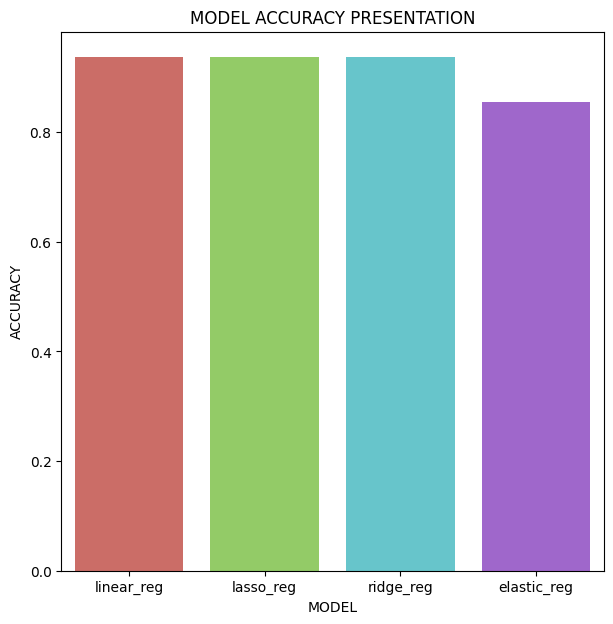

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(7,7))
plt.title('MODEL ACCURACY PRESENTATION')
sns.barplot(data=model_evaluation, x='Model', y='r2_square', palette='hls')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.show()

#### THAT'S IT, NOW WE WILL BE USING THESE CODES IN OUR src FOLDER